# Number of Changes in ZHLex Over Time

Selection criteria: All changes which are registered with a Nachtragsnummer.

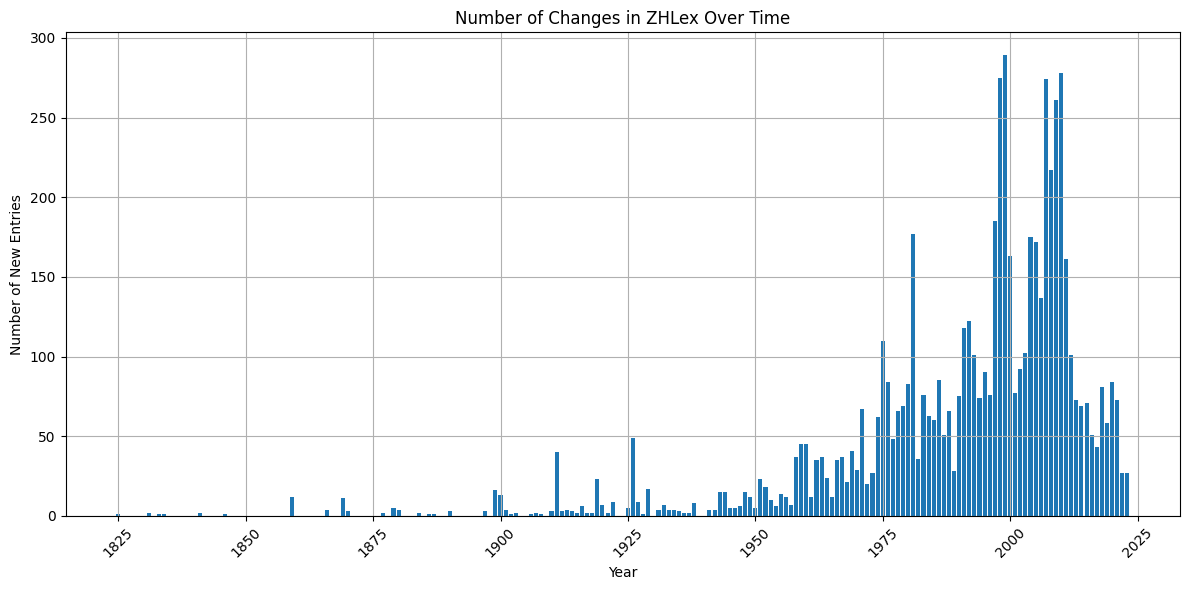

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON data
file_path = '20240401_zhlex_data.json'
data = pd.read_json(file_path, orient='records')

# Expand the 'versions' nested structure into a separate DataFrame
versions = pd.concat([pd.DataFrame(x) for x in data['versions']], keys=data['ordnungsnummer']).reset_index(level=1, drop=True).reset_index()
versions['erlassdatum'] = pd.to_datetime(versions['erlassdatum'], errors='coerce', format='%Y%m%d')

# Filter out rows where the date conversion was not successful (NaT values)
versions_clean = versions.dropna(subset=['erlassdatum'])

# Ensure the 'erlassdatum' is used as an index
versions_clean.set_index('erlassdatum', inplace=True)

# Aggregate the data by the 'erlassdatum' to count the new laws or versions per date, resampled by day
versions_per_date = versions_clean.resample('D').size()

# Resample the data by year for better spacing, using 'YE' instead of 'A'
versions_per_year = versions_per_date.resample('YE').sum()

# Convert the series to a DataFrame for plotting
versions_per_year_df = versions_per_year.to_frame(name='count')
versions_per_year_df['year'] = versions_per_year_df.index.year

# Generate the bar chart
plt.figure(figsize=(12, 6))
plt.bar(versions_per_year_df['year'], versions_per_year_df['count'])
plt.title('Number of Changes in ZHLex Over Time')
plt.xlabel('Year')
plt.ylabel('Number of New Entries')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels
plt.show()

# Number of New Entries in ZHLex Over Time

Selection criteria: Only the first version of an entry.

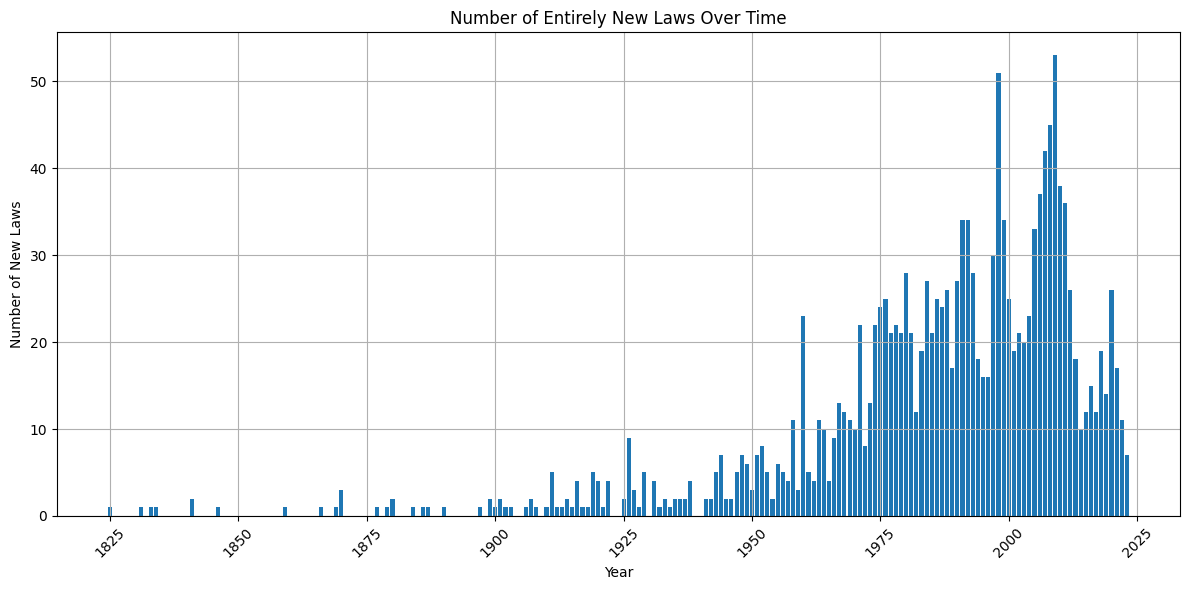

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON data
file_path = '20240401_zhlex_data.json'
data = pd.read_json(file_path, orient='records')

# Expand the 'versions' nested structure into a separate DataFrame
versions = pd.concat([pd.DataFrame(x) for x in data['versions']], keys=data['ordnungsnummer']).reset_index(level=1, drop=True).reset_index()
versions['erlassdatum'] = pd.to_datetime(versions['erlassdatum'], errors='coerce', format='%Y%m%d')

# Filter out rows where the date conversion was not successful (NaT values)
versions_clean = versions.dropna(subset=['erlassdatum'])

# Sort by 'erlassdatum' to ensure the earliest version is first
versions_clean = versions_clean.sort_values(by='erlassdatum')

# Drop duplicates to keep only the earliest version of each law
earliest_versions = versions_clean.drop_duplicates(subset=['ordnungsnummer'], keep='first')

# Set the 'erlassdatum' as the index
earliest_versions.set_index('erlassdatum', inplace=True)

# Aggregate the count of new laws by year
new_laws_per_year = earliest_versions.resample('YE').size()

# Convert the series to a DataFrame for plotting
new_laws_per_year_df = new_laws_per_year.to_frame(name='count')
new_laws_per_year_df['year'] = new_laws_per_year_df.index.year

# Generate the bar chart
plt.figure(figsize=(12, 6))
plt.bar(new_laws_per_year_df['year'], new_laws_per_year_df['count'])
plt.title('Number of Entirely New Laws Over Time')
plt.xlabel('Year')
plt.ylabel('Number of New Laws')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels
plt.show()

# Number of New Laws (Gesetze) in ZHLex Over Time

Selection criteria: Any entries which contain "Gesetz" but not "Verordnung"

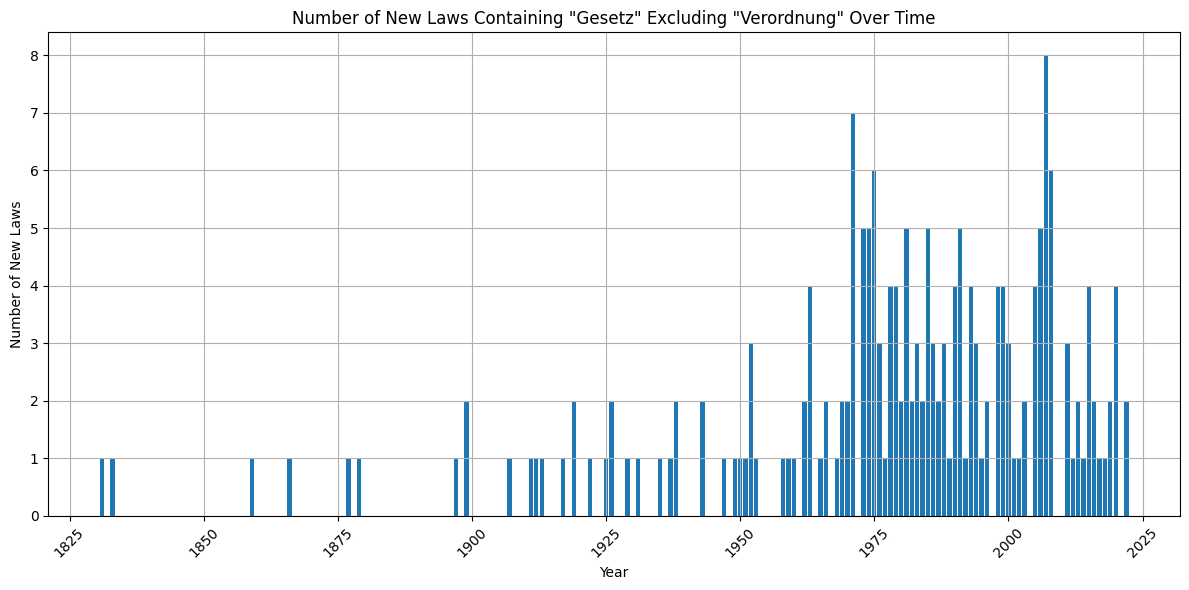

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON data
file_path = '20240401_zhlex_data.json'
data = pd.read_json(file_path, orient='records')

# Expand the 'versions' nested structure into a separate DataFrame
versions = pd.concat([pd.DataFrame(x) for x in data['versions']], keys=data['erlasstitel']).reset_index(level=1, drop=True).reset_index()
versions['erlassdatum'] = pd.to_datetime(versions['erlassdatum'], errors='coerce', format='%Y%m%d')

# Filter out rows where the date conversion was not successful (NaT values)
versions_clean = versions.dropna(subset=['erlassdatum'])

# Filter using 'erlasstitel': must contain "gesetz" but not "verordnung"
versions_filtered = versions_clean[
    versions_clean['erlasstitel'].str.lower().str.contains('gesetz') & 
    ~versions_clean['erlasstitel'].str.lower().str.contains('verordnung')
]

# Sort by 'erlassdatum' to ensure the earliest version is first
versions_filtered = versions_filtered.sort_values(by='erlassdatum')

# Drop duplicates to keep only the earliest version of each law
earliest_versions = versions_filtered.drop_duplicates(subset=['erlasstitel'], keep='first')

# Set the 'erlassdatum' as the index
earliest_versions.set_index('erlassdatum', inplace=True)

# Aggregate the count of new laws by year
new_laws_per_year = earliest_versions.resample('YE').size()

# Convert the series to a DataFrame for plotting
new_laws_per_year_df = new_laws_per_year.to_frame(name='count')
new_laws_per_year_df['year'] = new_laws_per_year_df.index.year

# Generate the bar chart
plt.figure(figsize=(12, 6))
plt.bar(new_laws_per_year_df['year'], new_laws_per_year_df['count'])
plt.title('Number of New Laws Containing "Gesetz" Excluding "Verordnung" Over Time')
plt.xlabel('Year')
plt.ylabel('Number of New Laws')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels
plt.show()

# Year with the Highest Amount of New Entries

Selection criteria: Only the first version of an entry.

In [7]:
import pandas as pd

# Read the JSON data
file_path = '20240401_zhlex_data.json'
data = pd.read_json(file_path, orient='records')

# Expanding the nested structure and including 'erlasstitel'
versions = pd.concat([pd.DataFrame(x['versions']) for _, x in data.iterrows()], keys=data['ordnungsnummer']).reset_index(level=1, drop=True).reset_index().rename(columns={'index': 'ordnungsnummer'})
versions['erlassdatum'] = pd.to_datetime(versions['erlassdatum'], errors='coerce', format='%Y%m%d')

# Ensure operations on a DataFrame copy by merging explicitly
versions = versions.merge(data[['ordnungsnummer', 'erlasstitel']], on='ordnungsnummer', how='left').copy()

# Sort by 'erlassdatum' and keep only the earliest version for each 'ordnungsnummer'
versions_sorted = versions.sort_values(by='erlassdatum').drop_duplicates(subset=['ordnungsnummer'], keep='first')

# Directly modifying the DataFrame we're working on to avoid setting with copy warning
versions_sorted['year'] = versions_sorted['erlassdatum'].dt.year

# Aggregate the count of new laws by year
new_laws_per_year = versions_sorted.groupby('year').size()

# Find the year with the highest number of new laws
max_new_laws_year = new_laws_per_year.idxmax()
max_new_laws_count = new_laws_per_year.max()  # Total for the year with the highest number of new laws

# Filter the laws introduced in that year
laws_in_max_year = versions_sorted[versions_sorted['year'] == max_new_laws_year]

# Display the year and the total count of new laws
print(f"Year with the highest number of entirely new laws: {max_new_laws_year} (Total: {max_new_laws_count})")
print("Laws introduced in this year:")
print(laws_in_max_year[['ordnungsnummer', 'erlasstitel']].to_string(index=False))

Year with the highest number of entirely new laws: 2009 (Total: 53)
Laws introduced in this year:
ordnungsnummer                                                                                                                                                                                                                                                       erlasstitel
        550.11                                                                                                                                                                                                           Verordnung über die polizeiliche Zwangsanwendung (PolZ)
        182.10                                                                                                                                                                                           Kirchenordnung der Römisch-katholischen Körperschaft des Kantons Zürich
   414.253.811                                                     Studienordnung f

# Year with the Highest Amount of New Entries

Selection criteria: Only the first version of an entry. Entry must contain "Gesetz" but not "Verordnung".

In [10]:
import pandas as pd

# Read the JSON data
file_path = '20240401_zhlex_data.json'
data = pd.read_json(file_path, orient='records')

# Expanding the nested structure and including 'erlasstitel'
versions = pd.concat([pd.DataFrame(x['versions']) for _, x in data.iterrows()], keys=data['ordnungsnummer']).reset_index(level=1, drop=True).reset_index().rename(columns={'index': 'ordnungsnummer'})
versions['erlassdatum'] = pd.to_datetime(versions['erlassdatum'], errors='coerce', format='%Y%m%d')

# Ensure operations on a DataFrame copy by merging explicitly
versions = versions.merge(data[['ordnungsnummer', 'erlasstitel']], on='ordnungsnummer', how='left').copy()

# Sort by 'erlassdatum' and keep only the earliest version for each 'ordnungsnummer'
versions_sorted = versions.sort_values(by='erlassdatum').drop_duplicates(subset=['ordnungsnummer'], keep='first')

# Filter for titles containing "gesetz" and not containing "verordnung" (case insensitive)
versions_sorted_filtered = versions_sorted[
    versions_sorted['erlasstitel'].str.lower().str.contains("gesetz") & 
    ~versions_sorted['erlasstitel'].str.lower().str.contains("verordnung")
].copy()

# Now, safely modify the DataFrame
versions_sorted_filtered['year'] = versions_sorted_filtered['erlassdatum'].dt.year

# Aggregate the count of new laws by year from the filtered data
new_laws_per_year_filtered = versions_sorted_filtered.groupby('year').size()

# Find the year with the highest number of new laws in the filtered dataset
max_new_laws_year_filtered = new_laws_per_year_filtered.idxmax()
max_new_laws_count_filtered = new_laws_per_year_filtered.max()

# Filter the laws introduced in that year from the filtered dataset
laws_in_max_year_filtered = versions_sorted_filtered[versions_sorted_filtered['year'] == max_new_laws_year_filtered]

# Display the year and the total count of new laws for the filtered dataset
print(f"Year with the highest number of entirely new laws containing 'Gesetz' but not 'Verordnung': {max_new_laws_year_filtered} (Total: {max_new_laws_count_filtered})")
print("Laws introduced in this year containing 'Gesetz' but not 'Verordnung':")
print(laws_in_max_year_filtered[['ordnungsnummer', 'erlasstitel']].to_string(index=False))

Year with the highest number of entirely new laws containing 'Gesetz' but not 'Verordnung': 1971 (Total: 8)
Laws introduced in this year containing 'Gesetz' but not 'Verordnung':
ordnungsnummer                                                                                erlasstitel
         831.3                                                                Zusatzleistungsgesetz (ZLG)
        935.21                                         Gesetz über die Vorführung von Filmen (Filmgesetz)
        415.19                                              Gesetz über die Teilverlegung der Universität
        415.14                                              Gesetz über die Teilverlegung der Universität
         822.4                                                          Ruhetags- und Ladenöffnungsgesetz
         554.5                                                                                Hundegesetz
         410.3       Gesetz über den Beitritt des Kantons Zürich zum Konkordat 

# Law with the highest Amount of Changes

Selection criteria: All changes which are registered with a Nachtragsnummer.

In [11]:
import pandas as pd

# Step 1: Read the JSON data
file_path = '20240401_zhlex_data.json'
data = pd.read_json(file_path, orient='records')

# Expanding the nested structure to include 'ordnungsnummer' and count versions
versions = (
    pd.concat(
        [pd.DataFrame(x["versions"]) for _, x in data.iterrows()],
        keys=data["ordnungsnummer"],
    )
    .reset_index(level=1, drop=True)
    .reset_index()
    .rename(columns={"index": "ordnungsnummer"})
)

# Count the number of versions for each law
version_counts = versions['ordnungsnummer'].value_counts()

# Find the law with the most versions
max_versions_ordnungsnummer = version_counts.idxmax()
max_versions_count = version_counts.max()

# Retrieve the title of the law with the most versions
law_title = data[data['ordnungsnummer'] == max_versions_ordnungsnummer]['erlasstitel'].iloc[0]

# Display the results
print(f"The law with the most versions is: {law_title} (Ordnungsnummer: {max_versions_ordnungsnummer}) with {max_versions_count} versions.")

# Print all versions
print("All versions:")
print(versions[versions['ordnungsnummer'] == max_versions_ordnungsnummer].to_string(index=False))

The law with the most versions is: Lehrpersonalverordnung (LPVO) (Ordnungsnummer: 412.311) with 53 versions.
All versions:
ordnungsnummer                                                                                                                    law_page_url                                                                                                                     law_text_url                                                                                               law_text_redirect nachtragsnummer erlassdatum inkraftsetzungsdatum aufhebungsdatum bandnummer hinweise
       412.311  https://www.zh.ch/de/politik-staat/gesetze-beschluesse/gesetzessammlung/zhlex-ls/erlass-412_311-2000_07_19-2000_10_01-124.html https://www.notes.zh.ch/appl/zhlex_r.nsf/OpenAttachment?Open&docid=6DDDC37200BB9681C1258AAE0024CDF1&file=412.311_19.7.00_124.pdf http://www2.zhlex.zh.ch/appl/zhlex_r.nsf/WebView/6DDDC37200BB9681C1258AAE0024CDF1/$File/412.311_19.7.00_124.pdf             124    20000

# Oldest Law still in Force

In [12]:
import pandas as pd

# Step 1: Read the JSON data
file_path = '20240401_zhlex_data.json'
data = pd.read_json(file_path, orient='records')

# Expanding the nested structure and including 'erlasstitel' and 'aufhebungsdatum'
versions = pd.concat([pd.DataFrame(x['versions']) for _, x in data.iterrows()], keys=data['ordnungsnummer']).reset_index(level=1, drop=True).reset_index().rename(columns={'index': 'ordnungsnummer'})
versions['erlassdatum'] = pd.to_datetime(versions['erlassdatum'], errors='coerce', format='%Y%m%d')

# Merge to include 'erlasstitel' for each version
merged_versions = versions.merge(data[['ordnungsnummer', 'erlasstitel']], on='ordnungsnummer', how='left')

# Assuming 'aufhebungsdatum' is in the versions, and a null value indicates the law is still in force
# Filter versions that are still in force (no 'aufhebungsdatum' or 'aufhebungsdatum' is in the future)
merged_versions['aufhebungsdatum'] = pd.to_datetime(merged_versions['aufhebungsdatum'], errors='coerce', format='%Y%m%d')
still_in_force = merged_versions[(merged_versions['aufhebungsdatum'].isna()) | (merged_versions['aufhebungsdatum'] > pd.to_datetime('today'))]

# Find the oldest law still in force
if not still_in_force.empty:
    oldest_law = still_in_force.sort_values(by='erlassdatum').iloc[0]
    law_title = oldest_law['erlasstitel']
    enactment_date = oldest_law['erlassdatum'].strftime('%Y-%m-%d')
    ordnungsnummer = oldest_law['ordnungsnummer']
    print(f"The oldest law still in force is: {law_title} (Ordnungsnummer: {ordnungsnummer}), enacted on {enactment_date}.")
else:
    print("No laws fitting the criteria were found.")

The oldest law still in force is: Übereinkunft zwischen der Schweizerischen Eidgenossenschaft und der Krone Württemberg betreffend die Konkursverhältnisse und gleiche Behandlung der beiderseitigen Staatsangehörigen in Konkursfällen (Ordnungsnummer: 283.1), enacted on 1825-12-12.
